# MLG: Lab 5 (Part 2)

## Exercise 3: Self-organized representation of a collection of images

### Dataset information

The Wang image database is a database of images grouped by class. In this dataset, we downloaded only the 1000 images. You can download them on this website: http://wang.ist.psu.edu/docs/home.shtml more precisely at this address: http://wang.ist.psu.edu/~jwang/test1.tar

For each class we have 100 corresponding images:
- 0-100: Africans
- 100-200: Beaches
- 200-300: Monuments
- etc...

All the images in this dataset are 250x166 pixels or 166x250 pixels.

In [2]:
import numpy as np
import matplotlib.pylab as pl
import KohonenUtils
import WangImageUtilities
%matplotlib inline

In [3]:
extractor = WangImageUtilities.ImageFeatureExtractor('Wang_Data')
# Here we load images from 300-399 and from 500-599
extractor.load_images(list_indices=list(np.arange(300, 400)) + list(np.arange(500, 600)))

200 images loaded!


### Dataset Visualization

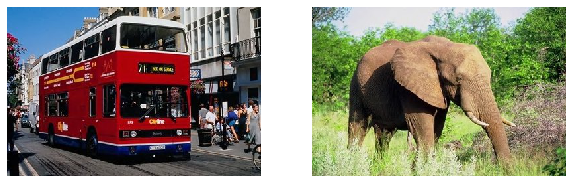

In [4]:
pl.figure(figsize=(10, 20))
pl.subplot(121)
pl.imshow(extractor.images[2])
pl.axis('off')
pl.subplot(122)
pl.imshow(extractor.images[101])
_ = pl.axis('off')

### Clustering with SOM

In [47]:
method = 1
if method == 1:
    histograms = extractor.extract_histogram()
elif method == 2:
    histograms = extractor.extract_hue_histogram()
elif method == 3:
    histograms = extractor.extract_color_histogram()
else:
    print('Implement your own method for extracting features if you like!')

/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/WangImageUtilities.py:48: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey = skicol.rgb2grey(image)


In [40]:
print(len(histograms))
print(histograms)

300
[[1.5300e+03 2.2160e+03 2.4170e+03 ... 6.5200e+02 7.7373e+04 6.8430e+03]
 [1.7890e+03 2.7370e+03 2.7380e+03 ... 1.1651e+04 6.7237e+04 3.8790e+03]
 [3.0800e+02 1.4630e+03 2.5820e+03 ... 1.4940e+04 5.3773e+04 2.9510e+03]
 ...
 [2.0650e+03 6.2480e+03 1.3629e+04 ... 9.1500e+02 1.9200e+02 4.7000e+01]
 [2.5864e+04 2.3059e+04 1.7793e+04 ... 1.3560e+03 2.6720e+03 3.6600e+02]
 [7.6480e+03 7.8940e+03 2.8639e+04 ... 1.9840e+03 1.3330e+03 9.9000e+01]]


In [48]:
kmap = KohonenUtils.KohonenMap(side_rows=8,
                               side_cols=8,
                               size_vector=histograms.shape[1])

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

names = []
for index in extractor.image_indices:
    names.append(str(index))

kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size)

/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


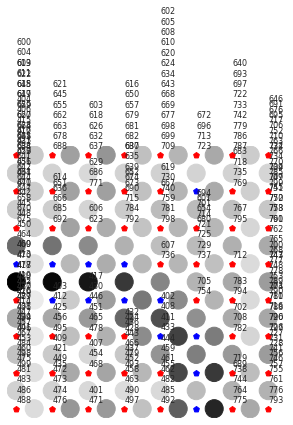

In [42]:
kmap.plot_umatrix(plot_empty=True, plot_names=True)

To simplify analysis, we can write the images to HTML. This is easier to see and analyze.

In [49]:
# Writes a 'som.html' file
# You can visualize the results and click on a neuron to see other images assigned to this neuron
extractor.to_html('som1.html', kmap)

<h3>REPORT (date of submission: 27.5 before 23:55)</h3>

1. Explain the three different methods we provided for extracting features. What do you understand about them (input, output), how do they work ?</p>

2. Try the SOM with several (minimum 3) different sets of images (always 100 images per class and at least two classes). You can change the size of the Self-Organizing Map as well as its parameters. 
<ul>
<li> Note that we provided three methods for extracting features: for at least one of the test you do try with all three methods and compare the results. 
<li> Include for each experiment an U-Matrix (with images - print screen of html)) that you find interesting. Explain why you find it interesting (what are the input images, with which features you trained your Self-Organizing Map, with which parameters, and how it is reflected in the results)...
</ul>
</p>

In [4]:
def everything(method=1, list_indices=list(np.arange(300, 400)) + list(np.arange(500, 600)), name="", nlines=8):
    extractor.load_images(list_indices=list_indices)

    # Choose preprocessing
    if method == 1:
        histograms = extractor.extract_histogram()
    elif method == 2:
        histograms = extractor.extract_hue_histogram()
    elif method == 3:
        histograms = extractor.extract_color_histogram()

    # Train
    kmap = KohonenUtils.KohonenMap(side_rows=nlines,
                                   side_cols=nlines,
                                   size_vector=histograms.shape[1])

    n_iter = 5
    learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
    neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

    names = []
    for index in extractor.image_indices:
        names.append(str(index))

    kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size)

    kmap.plot_umatrix(plot_empty=True, plot_names=True)
    
    extractor.to_html('soms/som{}{}.html'.format(name, method), kmap)

# Experience 1

300 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/WangImageUtilities.py:48: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey = skicol.rgb2grey(image)
/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


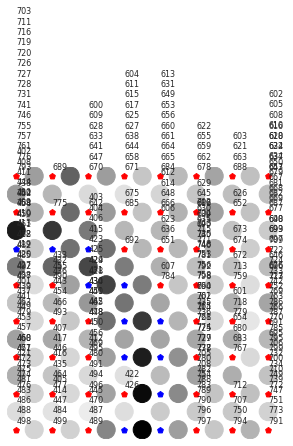

In [38]:
dino_hors_flow = list(np.arange(400, 500)) + list(np.arange(700, 800)) + list(np.arange(600, 700))
everything(1, dino_hors_flow, "DHF")

300 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


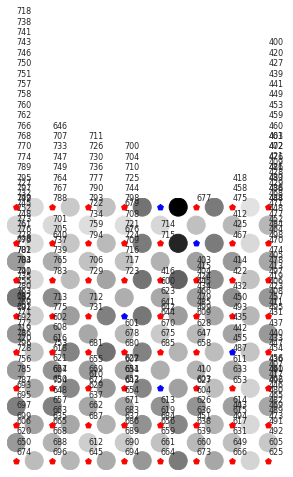

In [45]:
everything(2, dino_hors_flow, "DHF")

300 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


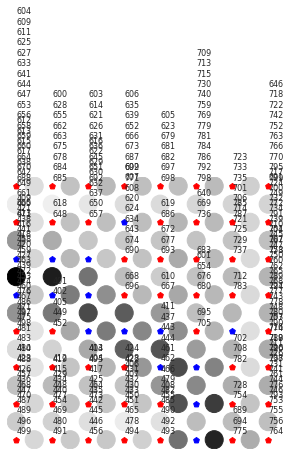

In [56]:
everything(3, dino_hors_flow, "DHF")

# Experience 2

300 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/WangImageUtilities.py:48: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey = skicol.rgb2grey(image)
/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


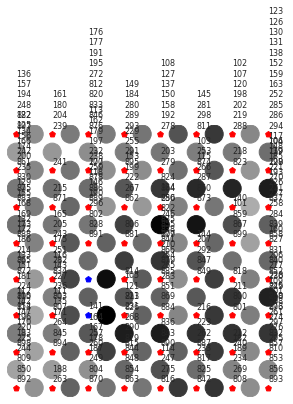

In [59]:
monu_beac_moun = list(np.arange(100, 200)) + list(np.arange(200, 300)) + list(np.arange(800, 900))
everything(1, monu_beac_moun, "MBM")

300 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


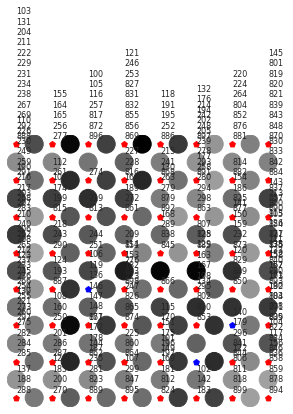

In [60]:
everything(2, monu_beac_moun, "MBM")

300 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


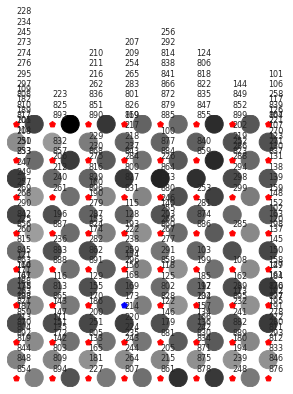

In [61]:
everything(3, monu_beac_moun, "MBM")

# Experiment 3

1000 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/WangImageUtilities.py:48: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey = skicol.rgb2grey(image)
/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


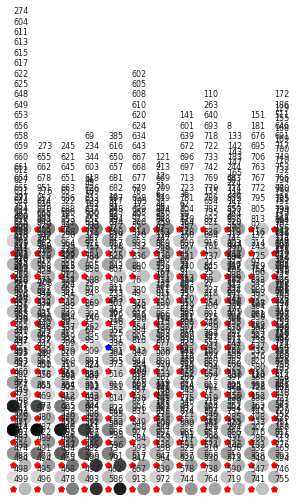

In [6]:
alli = list(np.arange(0, 1000))
everything(1, alli, "ALL", 12)

1000 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


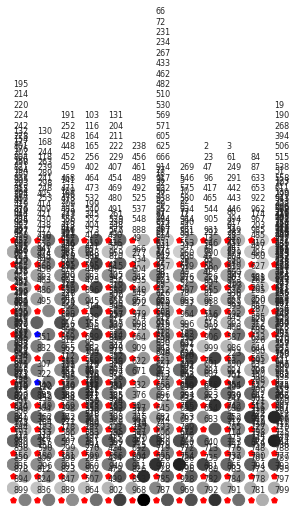

In [7]:
everything(2, alli, "ALL", 12)

1000 images loaded!


/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


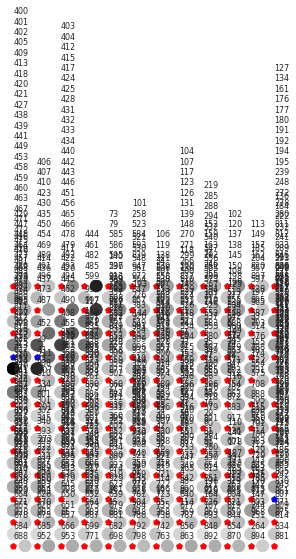

In [66]:
everything(3, alli, "ALL", 12)